<a href="https://colab.research.google.com/github/pedrogusferva/portfolio/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dados de hospedagem do AirBnb - Nova Iorque

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")

## Análise dos Dados

Veja o que foi importado do CSV acima. 

As variáveis são os nomes das colunas.

**Dicionário das variáveis**

* **id**: identificador único de cada imóvel
* **name**: nome do imóvel
* **host_id**: identificador único do hospedeiro
* **host_name**: nome do hospedeiro
* **neighbourhood_group**: região do bairro
* **neighbourhood**: bairro
* **latitude**: latitude do imóvel
* **longitude**: longitude do imóvel
* **room_type**: tipo do imóvel
* **price**: preço do aluguel
* **minimum_nights**: número mínimo de noites para alugar 
* **number_of_reviews**: número de avaliações do imóvel
* **last_review**: data da última avaliação
* **reviews_per_month**: número de avaliações por mês
* **calculated_host_listings_count**: número de imóveis do mesmo hospedeiro
* **availability_365**: número de dias disponível para aluguel por ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos ver quantas entradas existem no nosso dataframe.

Além disso, vamos ver também quais são os tipos de dados de cada coluna.

In [11]:
# identificar o volume de dados do DataFrame
print("Entradas: {}".format(df.shape[0]));
print("Variáveis: {}\n".format(df.shape[1]));
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 50246
Variáveis: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Percebemos que as **avaliações por mês** e a **data da última avalição** não estão presentes em +/- 20% dos dados.

Além disso, o **nome** do imóvel e o **nome do hospedeiro** também faltam em algumas linhas, mas de modo menos impactante.

In [16]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Como estão distribuídas as variáveis?**

Uma coisa interessante para avaliarmos é a frequência que cada variável aparece em relação a um determinado intervalo.

Por exemplo, vamos pegar a variável preço. Há imóveis com preços que vão dos 100 dólares até os 7000 dólares por exemplo.

Mas qual é a maioria dos preços? Ou seja, em que intervalo (digamos de 100 a 200 dólares ou de 300 a 400 dólares) a maioria dos imóveis estão?

Podemos responder facilmente essa pergunta usando um gráfico chamado de **histograma**, também conhecido como gráfico de **distribuição de frequências**.

Vejamos:



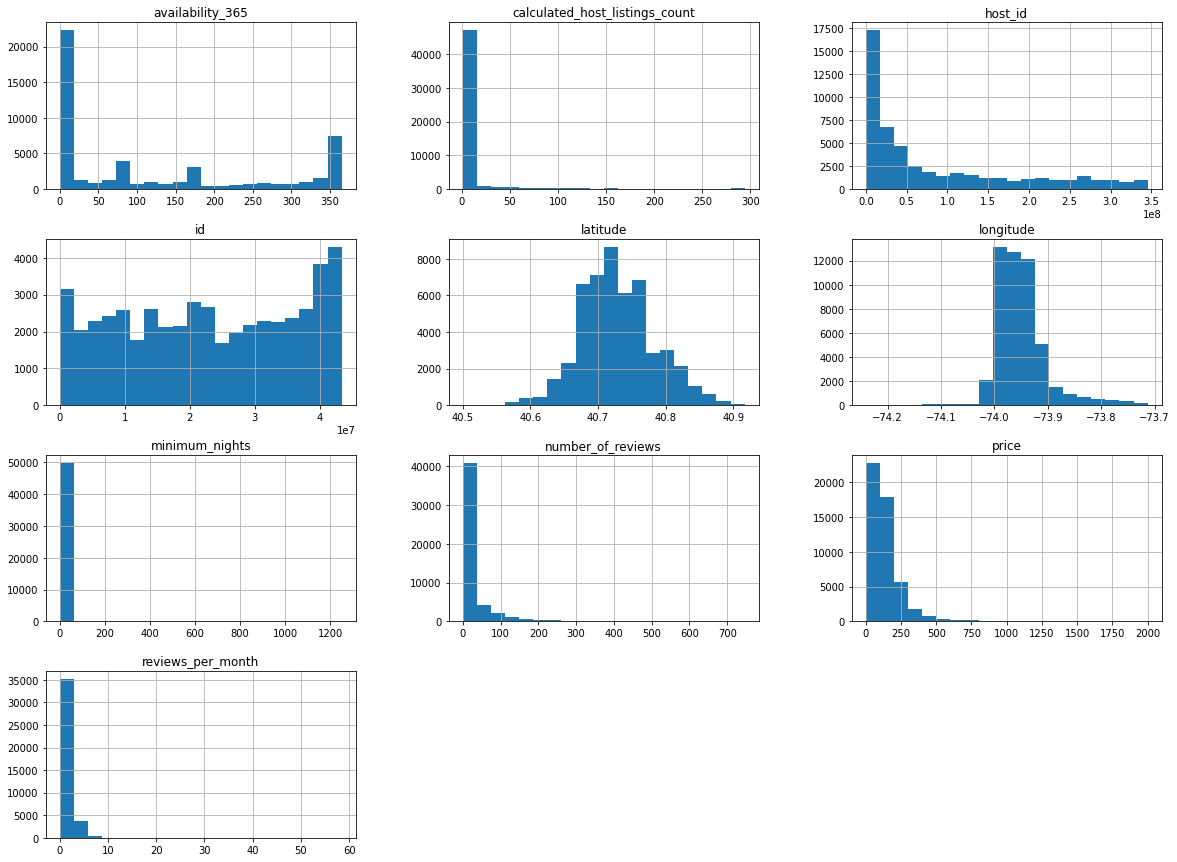

In [45]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,15));

Dado os nossos histogramas, vamos olhar o histograma do preço.

Perceba facilmente como a **maioria** dos preços está entre 0 e 2000 dólares. 

Outra consideração muito importante a fazer. Perceba que, assim como no gráfico do preço, a distribuição do gráfico do número mínimo de noites, as avaliações por mês, entre outros, é assimétrica. Ou seja, muito de um lado e quase nada do outro.

O que isso significa?

Que a média dos números não representaria a realidade, pois estaria distorcida devido aos **outliers**.

Por isso, para análises mais realísticas, deveremos fazer uma limpeza dos dados.



### **Q4. Qual a média dos preços de aluguel?**

Vejamos com mais clareza o que expliquei acima.


Veja a média dos preços dos aluguéis, sem a limpeza dos dados:

In [18]:
# ver a média da coluna `price``
df["price"].mean()

163.1307765792302

Incríveis 163.13 dólares.

Agora, vamos remover os **outliers**. 

No caso dos preços, percebemos que preços acima de 1000 dólares são bem incomuns, ou seja, outliers.

Portanto, vamos removê-los:

In [0]:
# remover os *outliers* em um novo DataFrame
df.drop(df[df.price > 1000].index, axis=0, inplace=True)

Feito isso, visualize o histograma de preços novamente.

Perceba agora como a distribuição mudou:

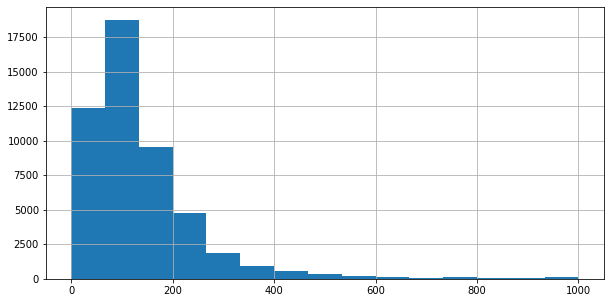

In [70]:
df['price'].hist(bins=15, figsize=(10,5));

Veja a média novamente:

In [71]:
df["price"].mean()

139.03084750515794

### **Q4. Qual a correlação existente entre as variáveis**

Antes de continuar, precisamos saber o que é  **correlação**.

Para explicar, vamos alterar a pergunta do título para: **Qual a relação entre as variáveis?**

Bom, a relação entre as variáveis, ou seja, o ponto em comum, o elo central, são os imóveis. Não importa qual variável você selecionar, ela terá como centro o imóvel. A variável será o atributo de um imóvel.

Agora, se pegarmos duas variáveis e notarmos um relação de interpendência, isto é, uma depende da outra, teremos uma **correlação**. 

Se aumentarmos uma variável e a outra aumentar também, teremos uma **correlação positiva**. Se acontecer o inverso, teremos uma **correlação negativa**.

Vale ressaltar que correlação não é o mesmo que causa e efeito, ou melhor, não siginifica que uma causa a outra. 

Para medirmos se existe uma correlação entre as variáveis do nosso dataframe, vamos usar a função "corr()", que vai fazer a matemática por nós.


In [54]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr();
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.021968,-0.051251,-0.035340,0.049161,0.093140
minimum_nights,0.021968,1.000000,-0.081551,-0.104016,0.168834,0.148725
number_of_reviews,-0.051251,-0.081551,1.000000,0.699673,-0.080370,0.187757
reviews_per_month,-0.035340,-0.104016,0.699673,1.000000,-0.064601,0.209634
calculated_host_listings_count,0.049161,0.168834,-0.080370,-0.064601,1.000000,0.167930
availability_365,0.093140,0.148725,0.187757,0.209634,0.167930,1.000000


Na diagonal da tabela, você vai ver o número 1. Isso acontece porque ele está medinda a correlação entre a mesma variável. Logo, a correlação é máxima.

Vale lembrar que os números da tabela são indicativos de propabilidade. 

Ou seja, quanto mais próximo de 1, maior a probabilidade de correlação.

Olhando a tabela, vemos que temos duas grandes chances de correlação: 
*   O **number_of_reviews** e **reviews_per_month**; e
*   E o **availability_365** com **reviews_per_month**.

Isso faz muito sentido. A primeira correlação é clara: quanto mais avaliações tiver um imóvel, mais tende a ser o número de avaliações por **mês**.

A segunda correlação também faz sentido. Quanto maior a disponibilidade do imóvel durante o ano, maior a chance de ele receber mais avaliações.

Para facilitar a nossa visualização, podemos usar mapa de calor. 

Veja como fica:



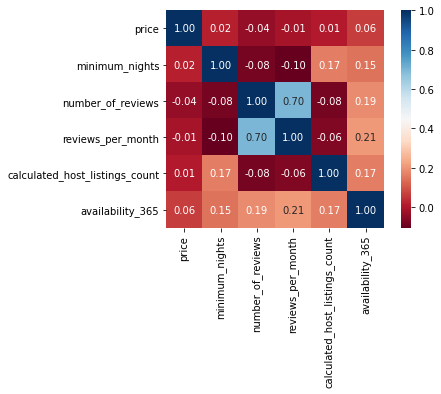

In [23]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais disponível para aluguel em Nova Iorque?**

Essa pergunta é muita fácil de responder.

Bastamos contar quantos entradas existem para cada tipo de imóvel. 

Fica assim:

In [26]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()

Entire home/apt    26073
Private room       22599
Shared room         1140
Hotel room           434
Name: room_type, dtype: int64

Portanto, o tipo de imóvel mais disponível para aluguel é "Entire home/apt", com incríveis 26073 imóveis.

E se quisermos saber em relação ao total de imóveis disponíveis? 

Basta pegarmos a porcentagem. 

Para isso, nós quantas entradas existem de cada tipo e dividimos por todas as entradas. 

Fica assim:

In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.518907
Private room       0.449767
Shared room        0.022688
Hotel room         0.008638
Name: room_type, dtype: float64

Percebemos então que mais de 50% dos imóveis são "Entire home/apt". 44% são do tipo "Private Room".

### **Q6. Qual a região mais cara de Nova Iorque?**

Com essa pergunta, queremos descobrir qual o bairro mais caro para se alugar um imóvel, ou seja, aquele que tem o maior preço médio.

Para fazer isso, o primeiro passo é somar o preço de todos os imóveis de cada bairro. 

Após isso, dividimos o preço pelo número de imóveis de cada bairro, resultando no preço médio.

Vejamos:



In [28]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Woodrow             2350.000000
Country Club        1000.000000
Manhattan Beach      861.538462
Fort Wadsworth       700.000000
Prince's Bay         506.666667
Midtown              503.619188
Theater District     487.131805
Tribeca              418.358974
Sea Gate             369.076923
Riverdale            337.000000
Name: price, dtype: float64

Descobrimos então que Woodrow é o bairro mais caro!

Vamos agora visualizar os imóveis através de um mapa. 

Além disso, vamos colocar uma cor. Sendo que mais próximo do azul mais barato e mais próximo do vermelho mais caro.

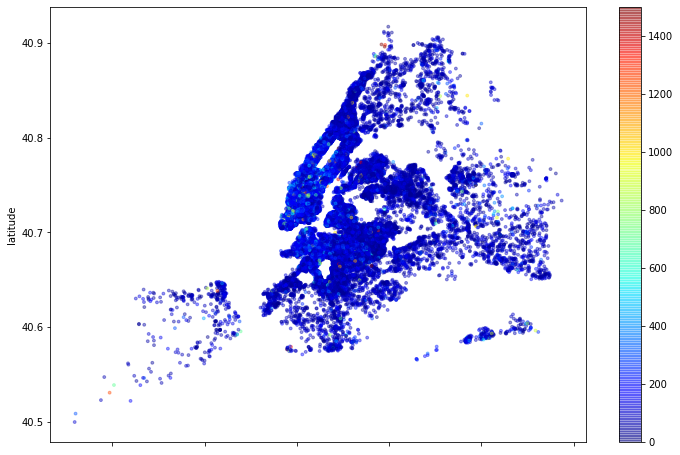

In [66]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Antes de continuarmos, vamos ver qual a distribuição dessa variável, para saber se ela vai afetar a nossa média.

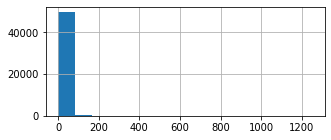

In [68]:
df['minimum_nights'].hist(bins=15, figsize=(5,2))


Percebemos claramente que há um outlier que vai deixar nossa média fora da realidade. 

Sem a limpeza dos dados, nossa média ficaria assim:

In [30]:
# ver a média da coluna `minimum_nights`
df['minimum_nights'].mean()


7.912968196473351

Agora, vamos remover os outliers, que vou considerar todos acima de 30 dias.

In [75]:
df.drop(df[df.minimum_nights > 30].index, axis=0, inplace=True);
df['minimum_nights'].mean()

6.377694184627898

Perceba como nossa média mudou, mas não significativamente. 

Isso ocorre porque o número de imóveis com o número alto de dias mínimos é tão pequeno se comparado com os de número baixo, que ele não afeta o cálculo. 

Mas vejamos agora como ficou o histograma:

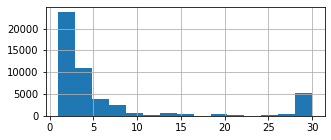

In [76]:
df['minimum_nights'].hist(bins=15, figsize=(5,2))


Uau!

Agora conseguimos perceber que, na maior parte dos casos, ou você aluga por no mínimo 2 dias ou por no mínimo 30 dias.

## Conclusões


Com uma análise básica dos dados do Airbnb de Nova Iorque, conseguimos ver algumas coisas bem interessantes. 

A primeira dela é que há uma correlação entre o número de avaliações e a disponibilidade do imóvel.

Assim como entre o número de avaliações e as avaliações mensais.

Outra coisa a se notar são os outliers.

Temos imóveis com um número impressionante de dias mínimo de aluguel.

Será que os donos colocaram esse número absurdo para justamente ninguém alugar?

Isso indicaria uma falta de funcionalidade no Airbnb para desativar uma oferta?

Seria o mesmo para o preço? 

Ou realmente seriam imóveis muito caros?

**Mas um outlier que gera uma dúvida mais interessante é de avaliações por mês**.

Vamos revisar novamente.

O número de avaliações por mês máximo que um imóvel já recebeu foi:


In [80]:
df['reviews_per_month'].max()

58.43

Veja bem, para ter esse número de avaliações seria necessário que um imóvel fosse alugado quase 2 vezes por dia.

É claro, talvez sejam avaliações dos meses passados. Mas nesse caso, é estranho que o número não seja maior.

O segundo ponto seria que talvez o imóvel fosse alugado para mais de uma pessoa ao mesmo tempo. Mas de novo, é estranto que esse número não seja maior. E outra coisa, quem faz a avaliação é o locatário, e não todos os visitantes. 

Vamos ver a média desse número. 

In [81]:
df['reviews_per_month'].mean()

1.0985226213894144

Como pode um imóvel ter 58 avaliações mês? 

Seria um esquema do proprietário para melhorar sua nota? 

Papo interessante, mas fica para uma próxima análise!